In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import rosbag

import os, sys

PYTHON_PATHS = ['/home/alena/repos/ros-bag-processing', '../']
for path in PYTHON_PATHS:
    if path not in sys.path:
        sys.path.append(path)
        
        
from ros_bag_processing.enlighting.hist_norm import HistNormModel
from ros_bag_processing.enlighting.gamma import GammaModel
from ros_bag_processing.enlighting.enlighten_gan import EnlightenGanModel
import utils

# !pip uninstall -y onnxruntime-gpu==1.8
# !pip install onnxruntime

from matching.fundamental_matrix import plot_good_matches, find_good_matches

# try:
#     from enlighten_inference import EnlightenOnnxModel as EnlightenGanModel
# except:
#     print("Error")
#     sys.exit()
import onnxruntime as rt
rt.get_device()



'GPU'

In [2]:
def read_bag(file_path, type='r'):
    return rosbag.Bag(file_path, type)

def check_dir(directory):
    print("Output will be saved in directory: {}".format(directory))
    if not os.path.exists(directory):
        print('New directory created')
        os.mkdir(directory)
            
def bag2images(bag_path, out_dir='output', img_topic='/camera/image_cropped'):
    bag = read_bag(bag_path)

    check_dir(out_dir)

    cnt = 0
    for topic, msg, t in tqdm(bag.read_messages(topics=[img_topic])):
        img = np.frombuffer(msg.data, dtype=np.uint8).reshape(msg.height, msg.width, -1)
        out_im_path = os.path.join(out_dir, '%06i.png' % cnt)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cv2.imwrite(out_im_path, img)
        cnt += 1
#         print('Wrote image: %i' % cnt)
    bag.close()

In [3]:
bag_path = '/home/alena/skoltech/thesis/article/dataset/final_mockup_dataset/bags/2021-11-24-21-10-35.bag'
output_path = '/home/alena/skoltech/thesis/article/dataset/final_mockup_dataset/images/2021-11-24-21-10-35/'
topic = '/camera/image_cropped'

In [4]:
bag2images(bag_path, out_dir=output_path, img_topic=topic)

FileNotFoundError: [Errno 2] No such file or directory: '/home/alena/skoltech/thesis/article/dataset/final_mockup_dataset/bags/2021-11-24-21-10-35.bag'

In [3]:
# image_folder = "../datasets/testA/"
# image_names = np.sort(os.listdir(image_folder))



# save_folder = "../pretrained_model_images"
# if not os.path.exists(save_folder):
#     os.mkdir(save_folder)

# model = EnlightenOnnxModel()

# for image_name in image_names:
#     image_path = os.path.join(image_folder, image_name)
#     img = cv2.imread(image_path)
#     processed = model.predict(img)
#     image_path = os.path.join(save_folder, image_name)
#     cv2.imwrite(image_path, processed)

### Image enlightning analysis

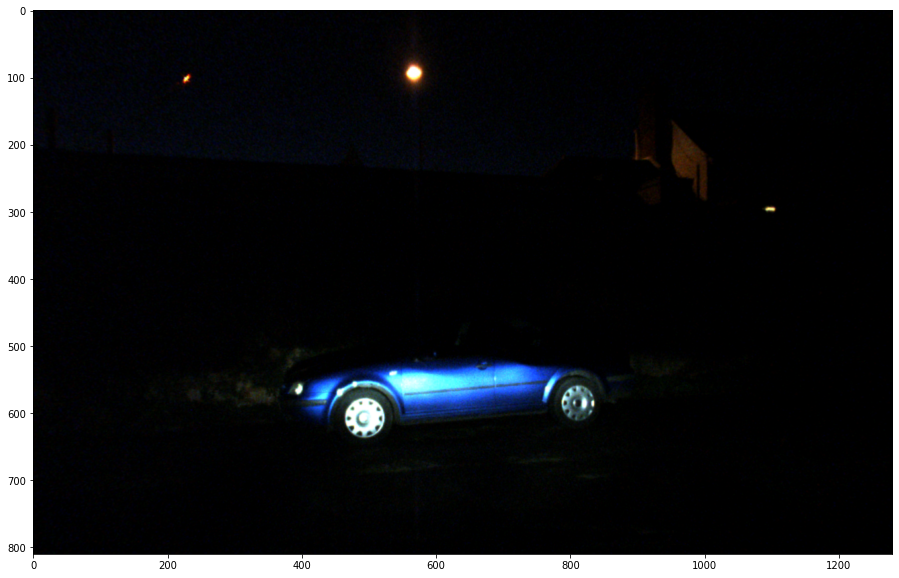

In [4]:
dataset_path = "/home/alena/Downloads/2014-11-14-16-34-33/image_0/"
image_names = np.sort(os.listdir(dataset_path))

img = cv2.imread(dataset_path + image_names[395])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplots(figsize=(20, 10))
plt.imshow(img)

In [5]:
model_gan = EnlightenGanModel()
model_hist = HistNormModel()
model_gamma = GammaModel(gamma=4)

/home/alena/miniconda3/envs/engan-pretrained/lib/python3.6/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:353: UserWarning: Deprecation warning. This ORT build has ['CUDAExecutionProvider', 'CPUExecutionProvider'] enabled. The next release (ORT 1.10) will require explicitly setting the providers parameter (as opposed to the current behavior of providers getting set/registered by default based on the build flags) when instantiating InferenceSession.For example, onnxruntime.InferenceSession(..., providers=["CUDAExecutionProvider"], ...)
  "based on the build flags) when instantiating InferenceSession."


In [6]:
img_gan = model_gan.predict(img)
img_hist = model_hist.predict(img)
img_gamma = model_gamma.predict(img)

Text(0.5, 1.0, 'Gamma Histogram, mean: 72.29')

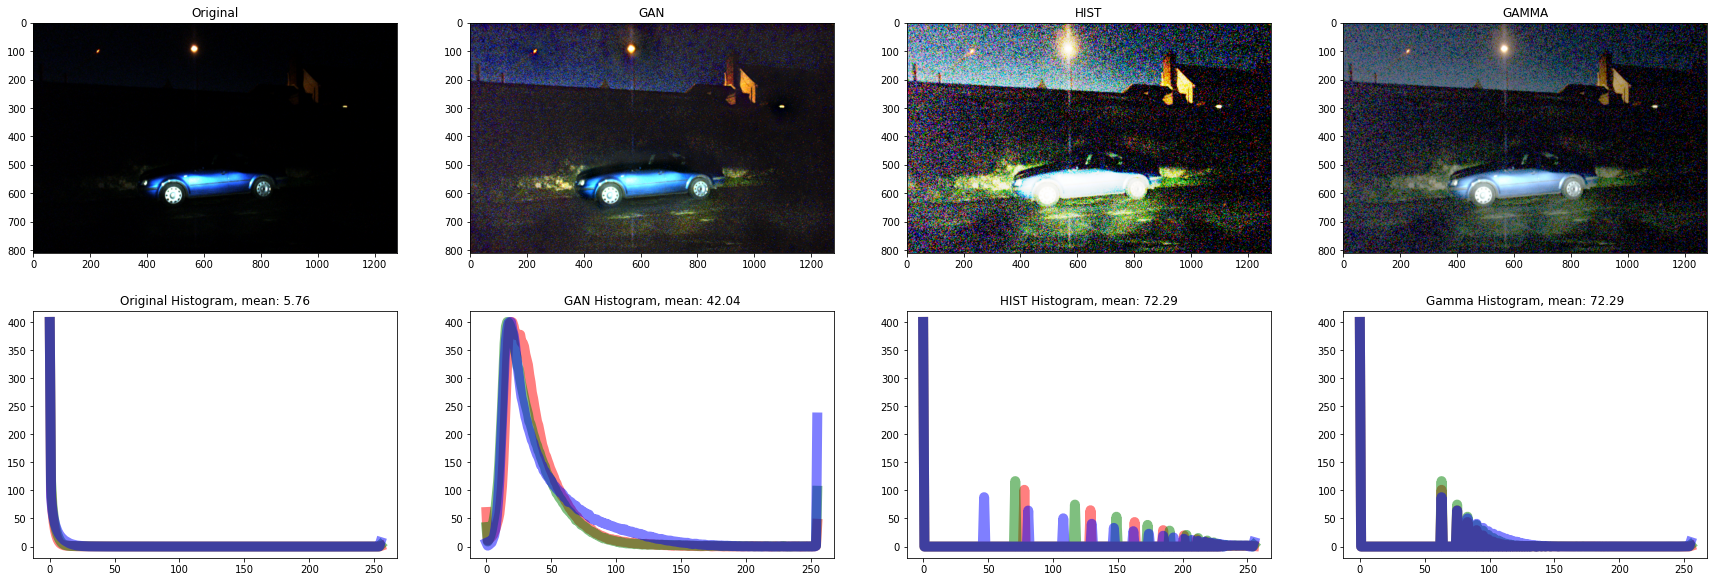

In [7]:
r_hist_hist, g_hist_hist, b_hist_hist = utils.get_rgb_hists(img_hist)
r_gan_hist, g_gan_hist, b_gan_hist = utils.get_rgb_hists(img_gan)
r_gamma_hist, g_gamma_hist, b_gamma_hist = utils.get_rgb_hists(img_gamma)
r_orig_hist, g_orig_hist, b_orig_hist = utils.get_rgb_hists(img)

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(30,10))
ax[0, 0].imshow(img)
ax[0, 0].set_title('Original')
ax[0, 1].imshow(img_gan)
ax[0, 1].set_title('GAN')
ax[0, 2].imshow(img_hist)
ax[0, 2].set_title('HIST')
ax[0, 3].imshow(img_gamma)
ax[0, 3].set_title('GAMMA')

ax[1, 0].plot(r_orig_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 0].plot(g_orig_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 0].plot(b_orig_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 0].set_title('Original Histogram, mean: ' + str(np.round(img.mean(), 2)))

ax[1, 1].plot(r_gan_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 1].plot(g_gan_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 1].plot(b_gan_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 1].set_title('GAN Histogram, mean: ' + str(np.round(img_gan.mean(), 2)))

ax[1, 2].plot(r_hist_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 2].plot(g_hist_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 2].plot(b_hist_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 2].set_title('HIST Histogram, mean: ' + str(np.round(img_hist.mean(), 2)))


ax[1, 3].plot(r_gamma_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 3].plot(g_gamma_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 3].plot(b_gamma_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 3].set_title('Gamma Histogram, mean: ' + str(np.round(img_hist.mean(), 2)))

In [8]:
model_gamma = GammaModel(gamma=1)
img_gan_gamma = model_gamma.predict(img_gan)

Text(0.5, 1.0, 'Gamma Histogram, mean: 72.29')

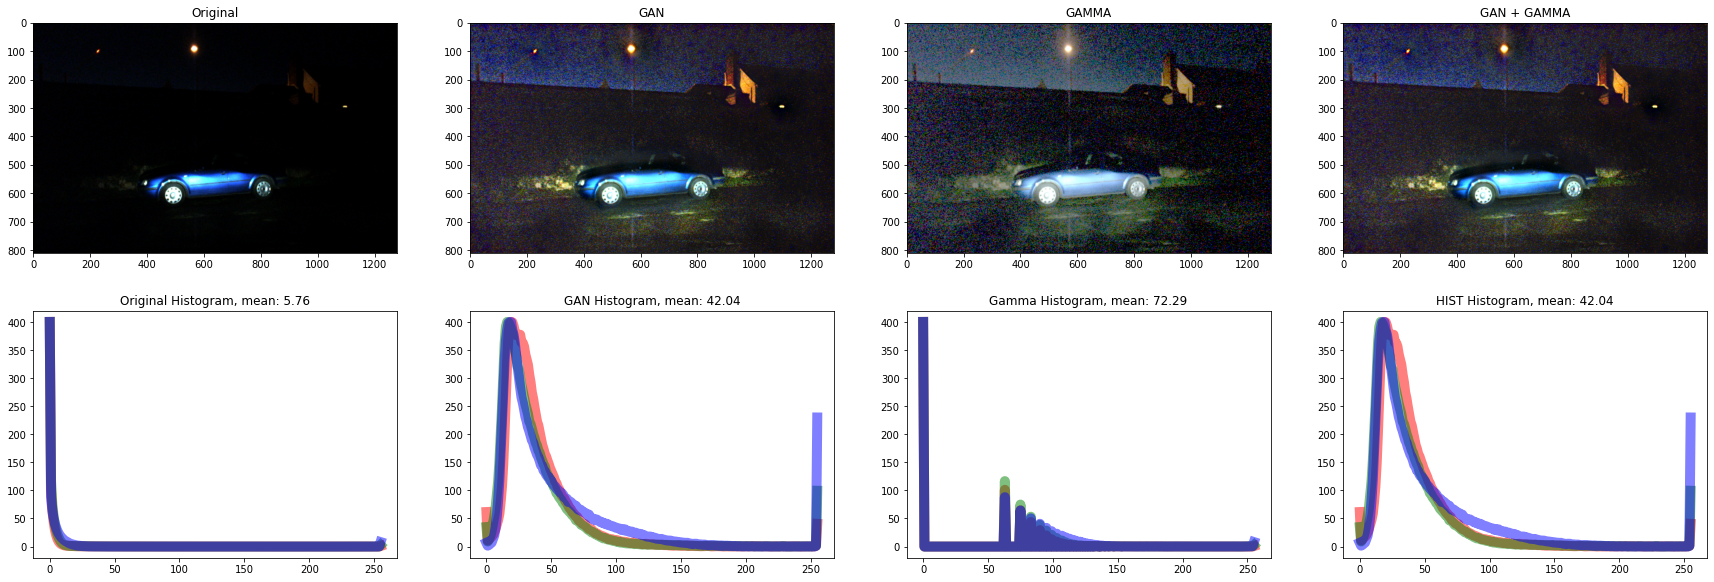

In [9]:
r_gg_hist, g_gg_hist, b_gg_hist = utils.get_rgb_hists(img_gan_gamma)

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(30,10))
ax[0, 0].imshow(img)
ax[0, 0].set_title('Original')
ax[0, 1].imshow(img_gan)
ax[0, 1].set_title('GAN')
ax[0, 3].imshow(img_gan_gamma)
ax[0, 3].set_title('GAN + GAMMA')
ax[0, 2].imshow(img_gamma)
ax[0, 2].set_title('GAMMA')

ax[1, 0].plot(r_orig_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 0].plot(g_orig_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 0].plot(b_orig_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 0].set_title('Original Histogram, mean: ' + str(np.round(img.mean(), 2)))

ax[1, 1].plot(r_gan_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 1].plot(g_gan_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 1].plot(b_gan_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 1].set_title('GAN Histogram, mean: ' + str(np.round(img_gan.mean(), 2)))

ax[1, 3].plot(r_gg_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 3].plot(g_gg_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 3].plot(b_gg_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 3].set_title('HIST Histogram, mean: ' + str(np.round(img_gan_gamma.mean(), 2)))


ax[1, 2].plot(r_gamma_hist, 'r', alpha=0.5, linewidth=10)
ax[1, 2].plot(g_gamma_hist, 'g', alpha=0.5, linewidth=10)
ax[1, 2].plot(b_gamma_hist, 'b', alpha=0.5, linewidth=10)
ax[1, 2].set_title('Gamma Histogram, mean: ' + str(np.round(img_hist.mean(), 2)))

In [10]:
h1, h2 = [600, 1200]
w1, w2 = [500,1100]
img_patch = img[h1:h2, w1:w2]

In [11]:
img_gan_patch = model_gan.predict(img_patch)
img_hist_patch = model_hist.predict(img_patch)

Text(0.5, 1.0, 'HIST Histogram, mean: 74.83')

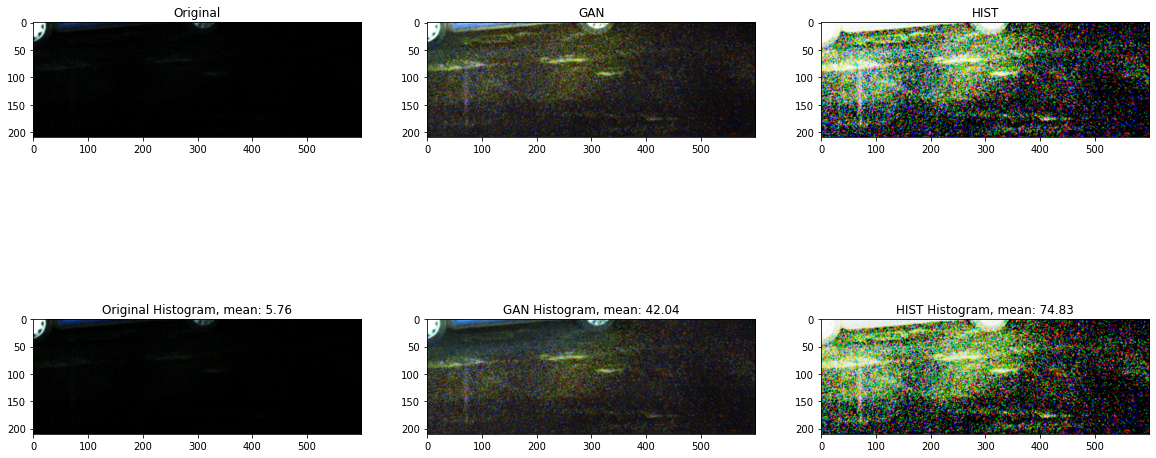

In [12]:
# r_hist_hist, g_hist_hist, b_hist_hist = utils.get_rgb_hists(img_hist_patch)
# r_gan_hist, g_gan_hist, b_gan_hist = utils.get_rgb_hists(img_gan_patch)
# r_orig_hist, g_orig_hist, b_orig_hist = utils.get_rgb_hists(img_patch)

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
ax[0, 0].imshow(img_patch)
ax[0, 0].set_title('Original')
ax[0, 1].imshow(img_gan_patch)
ax[0, 1].set_title('GAN')
ax[0, 2].imshow(img_hist_patch)
ax[0, 2].set_title('HIST')

ax[1, 0].imshow(img[h1:h2, w1:w2])
ax[1, 0].set_title('Original Histogram, mean: ' + str(np.round(img.mean(), 2)))

ax[1, 1].imshow(img_gan[h1:h2, w1:w2])
ax[1, 1].set_title('GAN Histogram, mean: ' + str(np.round(img_gan[h1:h2, w1:w2].mean(), 2)))

ax[1, 2].imshow(img_hist[h1:h2, w1:w2])
ax[1, 2].set_title('HIST Histogram, mean: ' + str(np.round(img_hist[h1:h2, w1:w2].mean(), 2)))

### Orb Extraction analysis

In [13]:
def orb_feature_exctraction(img):
    orb = cv2.ORB_create(nfeatures=2000)
    kp, descr = orb.detectAndCompute(img, None)
    orb_img = cv2.drawKeypoints(img, kp, None)
    return orb_img, kp, descr

Text(0.5, 1.0, 'GAN')

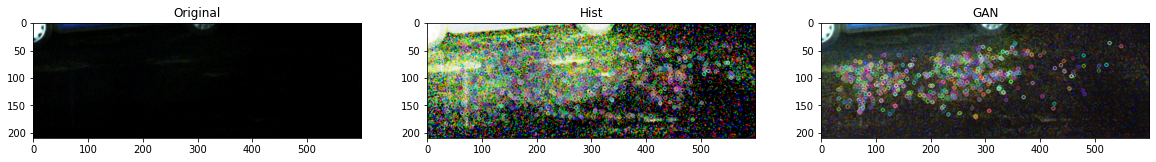

In [14]:
h1, h2 = [600, 1200]
w1, w2 = [500,1100]

img_patch = img[h1:h2, w1:w2]
img_gan_patch = img_gan[h1:h2, w1:w2]
img_hist_patch = img_hist[h1:h2, w1:w2]

orb_hist, _, _ = orb_feature_exctraction(img_hist_patch)
orb_orig, _, _ = orb_feature_exctraction(img_patch)
orb_gan, _, _  = orb_feature_exctraction(img_gan_patch)

fig, ax = plt.subplots(ncols=3, figsize=(20, 7))

ax[0].imshow(orb_orig)
ax[0].set_title('Original')

ax[1].imshow(orb_hist)
ax[1].set_title('Hist')

ax[2].imshow(orb_gan)
ax[2].set_title('GAN')

In [15]:
save_path = '/home/alena/Documents/dark-slam/fig4article/features_hist_gan'
orb_hist = cv2.cvtColor(orb_hist, cv2.COLOR_RGB2BGR)
orb_gan = cv2.cvtColor(orb_gan, cv2.COLOR_BGR2RGB)
cv2.imwrite(os.path.join(save_path, 'hist_feature.png'), orb_hist)
cv2.imwrite(os.path.join(save_path, 'gan_feature.png'), orb_gan)
cv2.imwrite(os.path.join(save_path, 'orig.png'), orb_orig)

True

# Thesis

### ORB features

Load two images from dataset

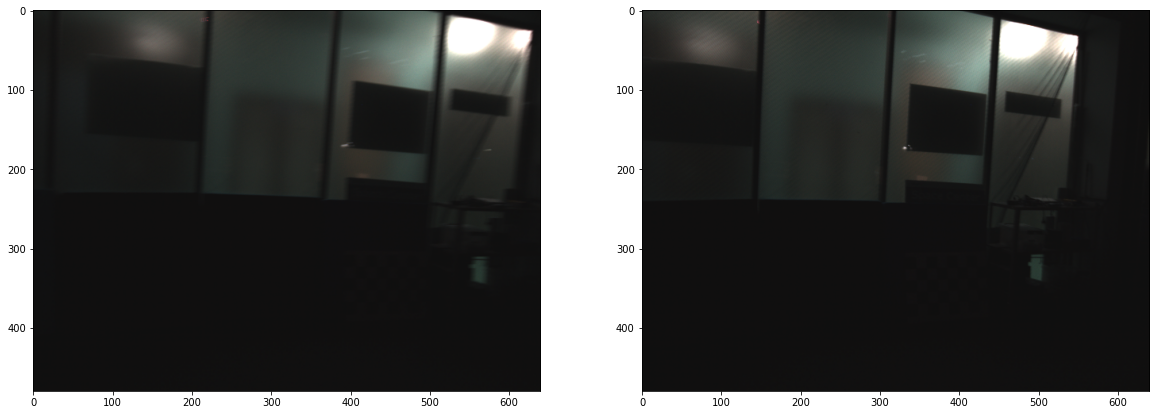

In [16]:
dataset_root = "/home/alena/Documents/dark-slam/datasets/original/2021-24-21-10-35/"
num = 22

image_path1 = os.path.join(dataset_root, '%06d.png'%num)
img1 = cv2.imread(image_path1)
# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

image_path2 = os.path.join(dataset_root, '%06d.png'%(num+10))
img2 = cv2.imread(image_path2)
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
ax[0].imshow(img1)
ax[1].imshow(img2)

Process images

In [3]:
model_gan = EnlightenGanModel()

model_gamma = GammaModel(gamma=2)

def predict(rgb_image):
    rgb_image = model_gamma.predict(rgb_image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    equalized_image_r = clahe.apply(rgb_image[:,:,0])
    equalized_image_g = clahe.apply(rgb_image[:,:,1])
    equalized_image_b = clahe.apply(rgb_image[:,:,2])
    equalized_image = np.concatenate((equalized_image_r[:,:,None], equalized_image_g[:,:,None], equalized_image_b[:,:,None]), axis=2)
    return equalized_image

model_hist = HistNormModel()

In [4]:
img_gan1 = model_gan.predict(img1)
img_gan2 = model_gan.predict(img2)

img_hist1 = model_hist.predict(img1)
img_hist2 = model_hist.predict(img2)

img_gamma1 = model_gamma.predict(img1)
img_gamma2 = model_gamma.predict(img2)

In [5]:
cv2.imwrite("../tests/hist1.png", img_hist1)
cv2.imwrite("../tests/hist2.png", img_hist2)

True

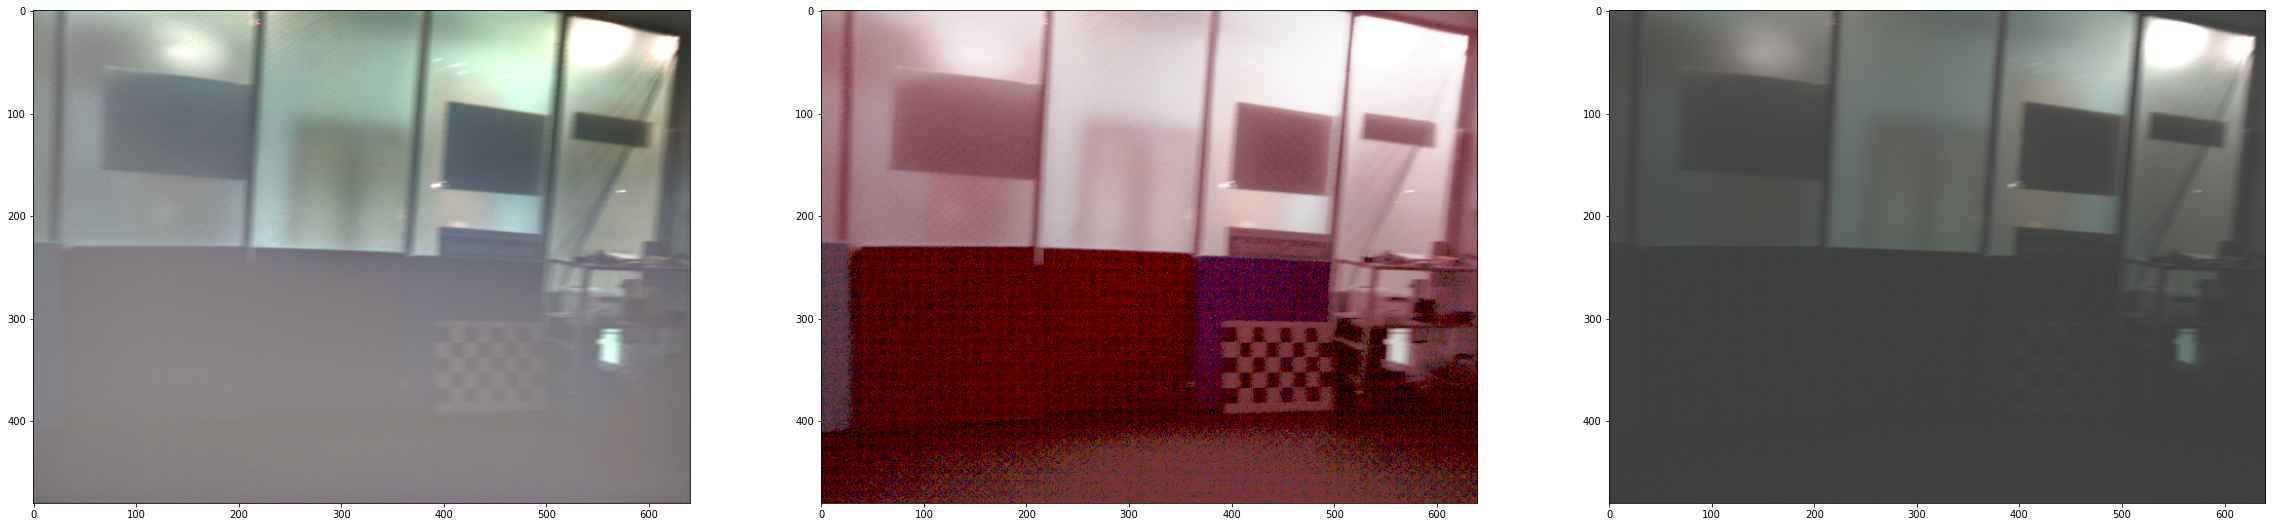

In [5]:
fig, ax = plt.subplots(ncols=3, figsize=(40, 20))
ax[0].imshow(img_gan1)
ax[1].imshow(img_hist1)
ax[2].imshow(img_gamma1)

In [6]:
def orb_feature_exctraction(img):
    orb = cv2.ORB_create(nfeatures=2000)
    kp, descr = orb.detectAndCompute(img, None)
    orb_img = cv2.drawKeypoints(img, kp, None)
    return orb_img, kp, descr

True

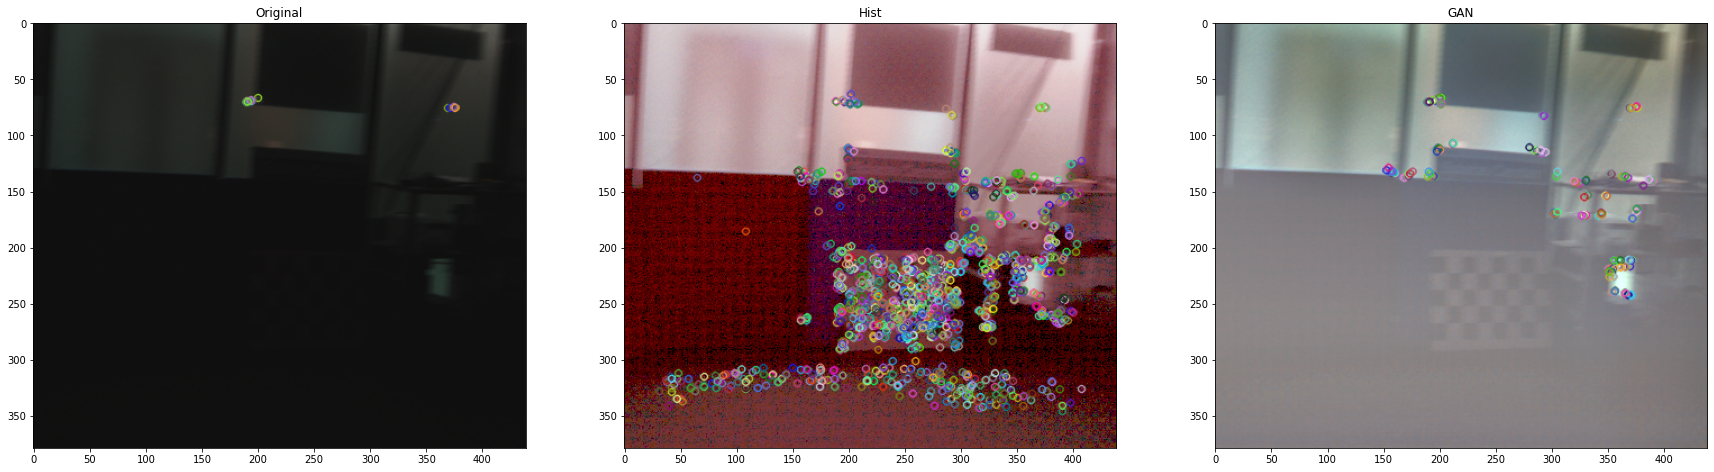

In [8]:
h1, h2 = [100, -1]
w1, w2 = [200, -1]

patched = True

if patched:

    orb_hist1, kp1h, ds1h = orb_feature_exctraction(img_hist1[h1:h2, w1:w2])
    orb_orig1, kp1o, ds1o = orb_feature_exctraction(img1[h1:h2, w1:w2])
    orb_gan1, kp1g, ds1g  = orb_feature_exctraction(img_gan1[h1:h2, w1:w2])
    
    orb_hist2, kp2h, ds2h = orb_feature_exctraction(img_hist2[h1:h2, w1:w2])
    orb_orig2, kp2o, ds2o = orb_feature_exctraction(img2[h1:h2, w1:w2])
    orb_gan2, kp2g, ds2g  = orb_feature_exctraction(img_gan2[h1:h2, w1:w2])
else:
    
#     orb_hist1, kp1h, ds1h = orb_feature_exctraction(img_hist1)
#     orb_orig1, kp1o, ds1o = orb_feature_exctraction(img1)
#     orb_gan1, kp1g, ds1g  = orb_feature_exctraction(img_gan1)
    
#     orb_hist2, kp2h, ds2h = orb_feature_exctraction(img_hist2)
#     orb_orig2, kp2o, ds2o = orb_feature_exctraction(img2)
#     orb_gan2, kp2g, ds2g  = orb_feature_exctraction(img_gan2)
    pass

fig, ax = plt.subplots(ncols=3, figsize=(30, 10))

ax[0].imshow(orb_orig1)
ax[0].set_title('Original')

ax[1].imshow(orb_hist1)
ax[1].set_title('Hist')

ax[2].imshow(orb_gan1)
ax[2].set_title('GAN')

cv2.imwrite("hist.png", orb_hist1)
cv2.imwrite("gan.png", orb_gan1)
cv2.imwrite("origt.png", orb_orig1)

In [ ]:
# plot_good_matches(orb_gan1, orb_gan2, kp1g, kp2g, ds1g, ds2g, f"Matches GH {num}")

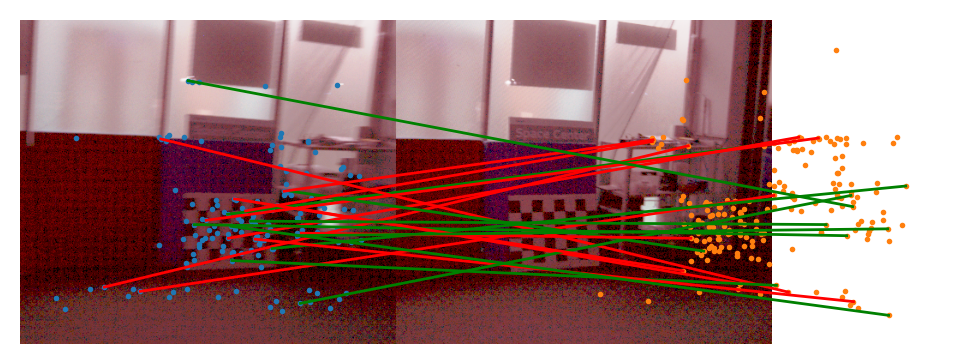

In [12]:
fig, ax = plt.subplots(dpi=200)
plot_good_matches(img_hist1[h1:h2, w1:w2], img_hist2[h1:h2, w1:w2], np.array(kp1h)[np.arange(0, len(kp1h), 10)], np.array(kp2h)[np.arange(0, len(kp2h), 10)], np.array(ds1h)[np.arange(0, len(ds1h), 50)], np.array(ds2h)[np.arange(0, len(ds2h), 50)],"", ax)
# plt.savefig('a', bbox_inches='tight')

array([<KeyPoint 0x7ff0644de4e0>, <KeyPoint 0x7ff07420d9f0>,
       <KeyPoint 0x7ff07420d4b0>, <KeyPoint 0x7ff0640f0cf0>,
       <KeyPoint 0x7ff074010690>], dtype=object)